![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


 # **Cortex Game: Round2--Conditional Amount**

Please note that you need to run this notebook 'Round2--Conditional Amount' first, before running the notebook 'Round2--Probability of Giving'.   

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [1]:
my_folder = "/content/drive/MyDrive/cortex"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Mounted at /content/drive
/content/drive/MyDrive/cortex


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [2]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.8.15


In [3]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [4]:
pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 33.9 MB/s 
  Created wheel for saspy: filename=saspy-4.4.1-py3-none-any.whl size=9937304 sha256=c5a5993e70f3731085c41e00c79b83ef5d1ba5fbc568eacab22635d527bd5f5e
  Stored in directory: /root/.cache/pip/wheels/0a/f6/ab/f7173c8a824856c66f6fd50194bb8fd3ef93fb4f1824be8d0c
Successfully built saspy


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [5]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
#'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [6]:
#%%writefile .authinfo
#oda user USR password PSW

Copy this file to home

In [7]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [8]:
import saspy
sas_session = saspy.SASsession(cfgfile=os.path.join(
    my_folder,"sascfg_personal.py"))
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 350



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/cortex/sascfg_personal.py
WORK Path             = /saswork/SAS_work4E350001CFA6_odaws01-usw2-2.oda.sas.com/SAS_work3A990001CFA6_odaws01-usw2-2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 118694


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [9]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                    Saturday, December  3, 2022 05:01:00 AM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                    Saturday, December  3, 2022 05:01:00 AM

33         


For local Jupyter

In [10]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

### Transform cloud SAS dataset to Python dataframe (pandas)

> For reference: 

> 1- [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)

> 2- [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [11]:
import pandas as pd

#comment: Transform cloud sas dataset to python dataframe(pandas) ==> might take some time.

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd2',
libref='cortex'
)

## Merge the Data

In [12]:
#Step1 Merge the Data
data_merge = pd.merge(data1, data2, on=["ID"],how="right")

## Exploration

In [13]:
data_merge.describe()

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000,1000000.000000
mean,2.500000e+06,0.516936,46.366170,65531.654000,4.582967,0.561413,0.560556,3.039636,1.666882,4.474148,104.454055,43.130251,85.897932,0.122101,7.673015,0.1,0.149457,9.409665
std,2.886753e+05,0.499713,18.945324,61051.122343,3.325844,0.996803,1.054027,2.120722,1.052090,2.588119,303.760477,150.249476,283.581066,0.327403,82.224854,0.3,0.356539,90.917731
min,2.000001e+06,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,2.250001e+06,0.000000,30.000000,20700.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000,20.000000,15.000000,20.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,2.500000e+06,1.000000,46.000000,44000.000000,4.000000,0.000000,0.000000,2.000000,1.000000,4.000000,40.000000,20.000000,30.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,2.750000e+06,1.000000,61.000000,91200.000000,7.000000,1.000000,1.000000,4.000000,2.000000,6.000000,90.000000,30.000000,75.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,3.000000e+06,1.000000,90.000000,250000.000000,10.000000,10.000000,16.000000,10.000000,10.000000,10.000000,15150.000000,10000.000000,10000.000000,1.000000,10000.000000,1.0,1.000000,10000.000000


In [14]:
data_merge.head()

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,University / College,City,2.0,0.0,...,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,1.0,0.0,0.0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,High School,Rural,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,High School,Rural,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,20.0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [15]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   ID            1000000 non-null  float64
 1   LastName      999977 non-null   object 
 2   FirstName     999996 non-null   object 
 3   Woman         1000000 non-null  float64
 4   Age           1000000 non-null  float64
 5   Salary        1000000 non-null  float64
 6   Education     1000000 non-null  object 
 7   City          1000000 non-null  object 
 8   SeniorList    1000000 non-null  float64
 9   NbActivities  1000000 non-null  float64
 10  Referrals     1000000 non-null  float64
 11  Recency       336334 non-null   float64
 12  Frequency     336334 non-null   float64
 13  Seniority     336334 non-null   float64
 14  TotalGift     336334 non-null   float64
 15  MinGift       336334 non-null   float64
 16  MaxGift       336334 non-null   float64
 17  GaveLastYear  1000000 non-nu

## Preprocessing

In [16]:
numeric = ['Age', 'Salary','TotalGift', 'AmtLastYear','NbActivities', 'Referrals', 'Recency', 'Frequency', 'Seniority', 'MinGift', 'MaxGift']
cat = ['Woman','SeniorList', 'GaveLastYear', 'Contact']

In [17]:
import numpy as np
def deal_with_nulls(data, otro):
  if not otro:
    #Recency
    data.loc[(data['GaveLastYear'] == 1.0), 'Recency'] = 1
    data.loc[np.isnan(data['Recency']) & (data['GaveLastYear'] == 0.0), 'Recency'] = 12
    data.loc[np.isnan(data['Recency']) & (data['GaveLastYear'] == 1.0), 'Recency'] = 1

    #Frequency
    data.loc[(data['GaveLastYear'] == 1.0), 'Frequency'] += 1
    data.loc[np.isnan(data['Frequency']) & (data['GaveLastYear'] == 0.0), 'Frequency'] = 0
    data.loc[np.isnan(data['Frequency']) & (data['GaveLastYear'] == 1.0), 'Frequency'] = 1

    #Seniority
    data['Seniority'].fillna(12, inplace = True)

    #TotalGift
    data.loc[(data['GaveLastYear'] == 1.0), 'TotalGift'] += data["AmtLastYear"]
    data.loc[np.isnan(data['TotalGift']) & (data['GaveLastYear'] == 0.0), 'TotalGift'] = 0 
    data.loc[np.isnan(data['TotalGift']) & (data['GaveLastYear'] == 1.0), 'TotalGift'] = data["AmtLastYear"]
    

    #MinGift
    data.loc[data['GaveLastYear'] == 1 & (data['AmtLastYear'] < data['MinGift']), 'MinGift'] = data['AmtLastYear']
    data.loc[np.isnan(data['MinGift']) & (data['GaveLastYear'] == 0.0), 'MinGift'] = 0 
    data.loc[np.isnan(data['MinGift']) & (data['GaveLastYear'] == 1.0), 'MinGift'] = data["AmtLastYear"]

    #MaxGift
    data.loc[data['GaveLastYear'] == 1 & (data['AmtLastYear'] > data['MaxGift']), 'MaxGift'] = data["AmtLastYear"]
    data.loc[np.isnan(data['MaxGift']) & (data['GaveLastYear'] == 0.0), 'MaxGift'] = 0 
    data.loc[np.isnan(data['MaxGift']) & (data['GaveLastYear'] == 1.0), 'MaxGift'] = data["AmtLastYear"]
  else:
    data[['MinGift']] = data[['MinGift']].fillna(value=0)
    data[['Recency']] = data[['Recency']].fillna(value=0)
    data[['Frequency']] = data[['Frequency']].fillna(value=0)
    data[['Seniority']] = data[['Seniority']].fillna(value=0)
    data[['TotalGift']] = data[['TotalGift']].fillna(value=0)
    data[['MaxGift']] = data[['MaxGift']].fillna(value=0)

  return data

In [18]:
def one_hot_encoding(data, columns):
  encoded_data = pd.get_dummies(data, columns = columns)
  
  return encoded_data

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def scalate(data, to_scale):
  #scaler = StandardScaler()
  scaler = MinMaxScaler()
  scaler.fit(data[to_scale])
  transformed = scaler.transform(data[to_scale])
  data[to_scale] = pd.DataFrame(transformed, columns = data[to_scale].columns)

  return data


In [20]:
prepro_data = deal_with_nulls(data_merge, True)
prepro_data = one_hot_encoding(prepro_data, ['Education', 'City'])
prepro_data = scalate(prepro_data, numeric)

In [21]:
prepro_data.tail()

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,...,Contact,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
999995,2999996.0,SCHUBERT,FRANCES,1.0,0.175676,0.0604,8.0,0.3,0.1250,0.5,...,0.0,0.0,0.0,0,1,0,0,0,0,1
999996,2999997.0,LUGGE,MARY,1.0,0.081081,0.0280,10.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0,1,0,0,0,0,1
999997,2999998.0,ROY,REGINALD,0.0,0.013514,0.0040,10.0,0.1,0.0625,0.1,...,0.0,0.0,0.0,0,1,0,1,0,0,0
999998,2999999.0,LIBERTI,PAMELA,1.0,0.216216,0.1756,0.0,0.0,0.0000,0.0,...,0.0,1.0,20.0,0,0,1,0,0,1,0
999999,3000000.0,BELL,SYBIL,1.0,0.459459,0.2096,4.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0,0,1,0,0,0,1


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1)

data_merge.corr()

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
ID,1.000000,-0.002832,-0.000720,-0.000759,0.000815,0.001128,-0.000853,0.000505,-0.000086,0.000268,-0.000664,-0.000120,-0.000692,-0.000741,0.000066,-0.001176,-0.000937,-0.000302
Woman,-0.002832,1.000000,0.037798,-0.046426,-0.000095,0.001681,-0.000138,-0.000800,-0.000370,-0.000852,0.028533,0.017376,0.028210,-0.000846,0.013658,0.000076,0.023525,0.022005
Age,-0.000720,0.037798,1.000000,0.019775,0.000349,0.000411,-0.002079,-0.000064,-0.000721,-0.000404,-0.028682,-0.016625,-0.028798,-0.001535,-0.013239,-0.000346,-0.024550,-0.020617
Salary,-0.000759,-0.046426,0.019775,1.000000,-0.000195,0.000421,0.000426,-0.001083,0.000899,-0.000420,0.042084,0.027365,0.041842,0.001101,0.021870,0.001023,-0.011217,0.022201
SeniorList,0.000815,-0.000095,0.000349,-0.000195,1.000000,0.408294,0.385607,0.435389,0.408919,0.511419,0.137358,0.072734,0.112789,-0.000125,0.001313,0.000146,-0.021144,-0.003646
NbActivities,0.001128,0.001681,0.000411,0.000421,0.408294,1.000000,0.527538,0.297161,0.559797,0.491847,0.209275,0.069346,0.164265,0.172631,0.050613,-0.000081,0.149688,0.045338
Referrals,-0.000853,-0.000138,-0.002079,0.000426,0.385607,0.527538,1.000000,0.280199,0.529110,0.464762,0.195753,0.065122,0.153312,0.160814,0.046003,-0.000125,0.139555,0.041981
Recency,0.000505,-0.000800,-0.000064,-0.001083,0.435389,0.297161,0.280199,1.000000,0.494675,0.832573,0.159598,0.185228,0.151049,0.059447,0.018427,0.000361,0.052598,0.014938
Frequency,-0.000086,-0.000370,-0.000721,0.000899,0.408919,0.559797,0.529110,0.494675,1.000000,0.826376,0.357162,0.120413,0.278724,0.170735,0.048566,0.000268,0.146691,0.044064
Seniority,0.000268,-0.000852,-0.000404,-0.000420,0.511419,0.491847,0.464762,0.832573,0.826376,1.000000,0.285212,0.147071,0.234419,0.119263,0.035069,-0.000158,0.102795,0.031094


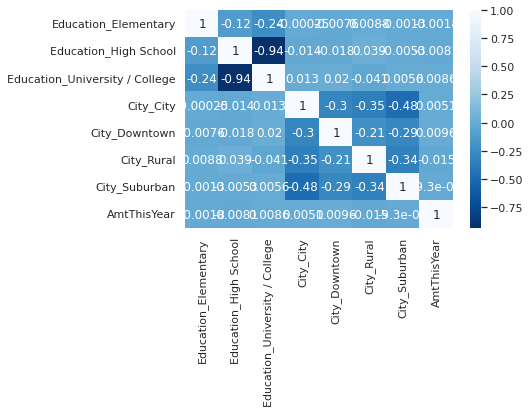

In [23]:
dummies_name = ['Education_Elementary', 'Education_High School', 'Education_University / College', 'City_City', 'City_Downtown', 'City_Rural', 'City_Suburban']
corr_dummies = prepro_data[dummies_name+['AmtThisYear']].corr()
sns.heatmap(corr_dummies, annot=True, cmap="Blues_r")
plt.show()

In [24]:
prepro_data = prepro_data.loc[(data_merge['GaveThisYear'] ==1)]
prepro_data.sample(5)

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,...,Contact,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
652422,2652423.0,WILLIAMS,EUGENE,0.0,0.067568,0.0688,3.0,0.3,0.0000,0.0,...,1.0,1.0,25.0,0,1,0,1,0,0,0
379000,2379001.0,HAMILTON,MICHAEL,0.0,0.878378,0.0596,10.0,0.5,0.2500,0.2,...,1.0,1.0,20.0,0,1,0,0,0,0,1
682949,2682950.0,CURRY,MARK,0.0,0.121622,0.1272,0.0,0.0,0.0000,0.0,...,1.0,1.0,20.0,0,1,0,0,0,1,0
478420,2478421.0,HEE,TERESA,1.0,0.391892,0.1948,4.0,0.3,0.1875,0.0,...,0.0,1.0,25.0,0,0,1,1,0,0,0
457167,2457168.0,PARKER,BENNY,0.0,0.459459,0.7612,4.0,0.1,0.0000,0.0,...,0.0,1.0,20.0,0,0,1,0,0,1,0


## Data Partition

In [25]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
train, validation = train_test_split(prepro_data, test_size=0.1,random_state=5678) # you can change the percentage
train.sample(5)

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,...,Contact,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
538535,2538536.0,BATISTA,LEROY,0.0,0.527027,0.1672,4.0,0.0,0.1875,0.0,...,0.0,1.0,40.0,0,1,0,1,0,0,0
588246,2588247.0,ROBERTS,WILMA,1.0,0.891892,0.0484,8.0,0.5,0.4375,0.2,...,0.0,1.0,125.0,0,1,0,1,0,0,0
735894,2735895.0,MCGOWEN,JOSEPHINE,1.0,0.175676,0.2260,6.0,0.0,0.1250,0.4,...,0.0,1.0,20.0,0,1,0,1,0,0,0
597882,2597883.0,SILVA,JAMES,0.0,0.310811,0.1804,8.0,0.0,0.0000,0.0,...,0.0,1.0,50.0,0,1,0,0,1,0,0
216643,2216644.0,SIERRA,PAMELA,1.0,0.945946,0.0860,8.0,0.0,0.0000,0.0,...,1.0,1.0,20.0,0,0,1,0,0,0,1



## Prebuilt Models

***
### Linear Regression Model


> The [sk-learn library]( https://scikit-learn.org/stable/index.html) offers more advanced models. 

In [26]:
from sklearn import linear_model
#chosen = ['Age', 'Salary','Contact','MinGift', 'GaveLastYear','AmtLastYear','Woman', 'NbActivities', 'Recency', 'Education_University / College', 'City_Rural']
#comment: it's numpy array
other = ['Age', 'Salary','Contact','MinGift', 'GaveLastYear','AmtLastYear','Woman', 'NbActivities' ]
chosen = ['Age', 'Salary','MinGift', 'GaveLastYear','Woman', 'AmtLastYear', 'NbActivities', 'Frequency', 'Contact'] + dummies_name
#chosen = ['Age', 'Salary','MinGift', 'GaveLastYear','Woman', 'AmtLastYear', 'NbActivities', 'Frequency', 'Contact','MinGift', 'TotalGift'] + dummies_name
X_train = train[chosen]
Y_train = train['AmtThisYear']
X_valid = validation[chosen] 
Y_valid = validation['AmtThisYear']

regr = linear_model.LinearRegression()

regr.fit(X_train,Y_train)

regr_predict=regr.predict(X_valid)

print(regr_predict)

[ 57.01754393  18.48033006 127.57732697 ...  38.18838206  48.64484829
  67.21098185]


In [27]:
#you can change the criteria

import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,regr_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,regr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,regr_predict)))

63.96993906045639
51954.82689212872
227.93601490797528


## Regression Tree Model（Py）

In [28]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor(max_depth=5, random_state=0).fit(X_train,Y_train)
DT_predict = DT_model.predict(X_valid) #Predictions on Testing data
print(DT_predict)

[ 56.27443985  31.14259373 168.09528082 ...  43.4520184   43.4520184
  50.40860056]


In [29]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,DT_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict)))

63.274217954073904
51464.01063313148
226.85680645096696


## Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(max_depth=5, random_state=42)
RF_model.fit(X_train, Y_train)

RF_predict = RF_model.predict(X_valid)

In [31]:
#MAE
print(metrics.mean_absolute_error(Y_valid,RF_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,RF_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,RF_predict)))

63.25678662956334
51478.60801398297
226.88897728621143


## XGBoost

In [32]:
import xgboost as xgb
"""{'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 7,
 'reg_lambda': 10,
 'scale_pos_weight': 3}"""
xgb_model = xgb.XGBRegressor(random_state=123, gamma = 1, learning_rate=0.1, max_depth = 7, reg_lambda=10, scale_pos_weight=3)

# Fit
xgb_model.fit(X_train, Y_train)

# Predict
xgb_predict = xgb_model.predict(X_valid)

[05:02:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [33]:
#MAE
print(metrics.mean_absolute_error(Y_valid,xgb_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,xgb_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,xgb_predict)))

63.33239420034888
51851.733883889574
227.70975799005535


### **Other models may also be helpful for this game**

Reference: https://scikit-learn.org/stable/supervised_learning.html


## Scoring New Data

### Prepare data for scoring

In [34]:
data3 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score_rd2_contact',
libref='cortex'
)
data5 = sas_session.sasdata2dataframe(
table='score_rd2_nocontact',
libref='cortex'
)

 ### Score new data based on your champion model
 
 Pick your champion model from previous steps and use it to predict next year donations. 
 
 In this case, the linear regression model performed better than the regression tree based on the MSE criteria.

### Predict 'amount given' for members who were contacted

In [35]:
scoring_data_contact = pd.merge(data3, data4, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_contact = deal_with_nulls(scoring_data_contact, True)
scoring_data_contact = one_hot_encoding(scoring_data_contact,['Education', 'City'])
scoring_data_contact = scalate(scoring_data_contact, numeric)

#scoring_data_contact.head()

X = scoring_data_contact[chosen] 

RF_predict_contact=RF_model.predict(X)

scoring_data_contact['Prediction'] = RF_predict_contact

scoring_data_contact= scoring_data_contact[['ID','Prediction']]
scoring_data_contact = scoring_data_contact.rename({'Prediction': 'AmtContact'}, axis=1) 
scoring_data_contact.head()

,ID,AmtContact
0,2000001.0,59.902921
1,2000002.0,54.946877
2,2000003.0,102.095927
3,2000004.0,40.220511
4,2000005.0,107.206103


### Predict 'amount given' for members who were not contacted

In [36]:
scoring_data_nocontact = pd.merge(data3, data5, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_nocontact = deal_with_nulls(scoring_data_nocontact, True)
scoring_data_nocontact = one_hot_encoding(scoring_data_nocontact,['Education', 'City'])
scoring_data_nocontact = scalate(scoring_data_nocontact, numeric)

#scoring_data_nocontact.head()

X = scoring_data_nocontact[chosen] 

regr_predict_nocontact=regr.predict(X)

scoring_data_nocontact['Prediction'] = regr_predict_nocontact

scoring_data_nocontact= scoring_data_nocontact[['ID','Prediction']]
scoring_data_nocontact = scoring_data_nocontact.rename({'Prediction': 'AmtNoContact'}, axis=1) 
scoring_data_nocontact.head()

,ID,AmtNoContact
0,2000001.0,75.394849
1,2000002.0,51.356094
2,2000003.0,63.792519
3,2000004.0,31.605214
4,2000005.0,69.056453


In [37]:
result_Amt = pd.merge(scoring_data_contact, scoring_data_nocontact, on=["ID"],how="right")
result_Amt.sort_values(by=['ID'], inplace=True)
result_Amt.head(3)

,ID,AmtContact,AmtNoContact
0,2000001.0,59.902921,75.394849
1,2000002.0,54.946877,51.356094
2,2000003.0,102.095927,63.792519


## Exporting Results to a CSV File

In [38]:
result_Amt.to_csv('Round2_Output_amt.csv', index=False)

In [39]:
# Reminder: You are now done with step 1 of Round 2 on predicting the conditional amount.
# Next, to complete Round2, you need to perform step 2 to predict the probability of giving, calculate the uplift and prepare your decision.

In [40]:
!head Round2_Output_amt.csv

ID,AmtContact,AmtNoContact
2000001.0,59.90292125272901,75.39484930837777
2000002.0,54.94687679732393,51.3560942034364
2000003.0,102.0959273974884,63.792519259771865
2000004.0,40.2205108191173,31.605214096848815
2000005.0,107.20610317043486,69.05645289174822
2000006.0,37.049398284927044,28.212286659710426
2000007.0,30.64293417841352,45.624511257942444
2000008.0,58.981562187127444,63.07296369835893
2000009.0,43.53916230948834,39.72757634081598
